# Statistics

---

### Names: [Insert your name here]

**Before you do anything else, go to File -> Save a Copy in Drive. Make any requested edits to that copy.**

This lab explores probability distributions, how they can be propogated through an equation, and how probabilities can be combined to estimate the parameters of a model.

#### New Code:

This lab will introduce a number of different pieces of code, including code that can:


*   Draw random numbers from a Poisson distribution
*   Draw random numbers from a Gaussian distribution
*   Calculate the probability density of a Posisson distribution at a given value
*   Calculate the probability that a value drawn from a given Poisson distribution is greater than X
* Calculate the value X such that the probability of drawing a smaller value is P for a Poisson distribution
* Calculate the probability density of a Gaussion distribution at a given value
* Calculate the probability that a value drawn from a given Gaussian distribution is greater than X
* Calculate the value X such that the probability of drawing a smaller value is P for a Gaussian distribution
* `==`, `!=`, `>`, `<`, `<=`, `>=`, `&`, `|`
* Select out points in a numpy array based on certain criteria.

---



### Probability distributions

If we repeat an experiment many times (e.g., take many images of a star and measure its flux in each image) we will not obtain the exact same result every time. Instead we will obtain a range of different values, and the relative probability of each of these values is given by a probability distribution.  Python has built-in functions that allows us to draw values from a Poisson or Gaussian distribution. This can be useful if we want to model an experiement, or estimate the relative probability of obtaining different values.

In [2]:
# Import useful packages
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

Lets first look at a Poisson distribution. Remember that the Poisson distribution is defined for integer values and is given by :

$P(x,\mu ) = \frac{\mu^x}{x!}\exp^{-\mu}$

where $\mu$ is the average value of the distribution. Poisson distributions apply to counting statistics, e.g. counting the number of photons that arrive at our detector.

Within python, we can draw a random number from a Poisson distribution. If we do this a larger number of times, and plot a histogram of the different values drawn from this distribution, we can visualize the Poisson distribution .

(array([134.,   0.,   0.,   0., 263.,   0.,   0.,   0., 264.,   0.,   0.,
          0., 190.,   0.,   0.,   0.,   0.,  90.,   0.,   0.,   0.,  40.,
          0.,   0.,   0.,  14.,   0.,   0.,   0.,   5.]),
 array([0.        , 0.23333333, 0.46666667, 0.7       , 0.93333333,
        1.16666667, 1.4       , 1.63333333, 1.86666667, 2.1       ,
        2.33333333, 2.56666667, 2.8       , 3.03333333, 3.26666667,
        3.5       , 3.73333333, 3.96666667, 4.2       , 4.43333333,
        4.66666667, 4.9       , 5.13333333, 5.36666667, 5.6       ,
        5.83333333, 6.06666667, 6.3       , 6.53333333, 6.76666667,
        7.        ]),
 [<matplotlib.patches.Polygon at 0x7fe3bc189a30>])

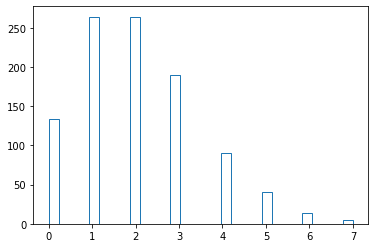

In [3]:
# Set the average value
mu = 2

# Draw 1000 random numbers from a Poisson distribution
poiss_data = np.random.poisson(mu,size=1000) #<- the size parameter sets the number of random numbers drawn from the given distribution

# Plot a histogram of the random numbers
plt.hist(poiss_data,30,histtype='step')

Next, lets look at a Gaussian distribution. The formula for a Gaussian distribution is:

$P(x, \mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}}\exp^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2} $

where $\mu$ is the mean of the distribution and $\sigma$ is the standard deviation.

As with the Poisson distribution, we can draw random numbers from a Gaussian distribution. If we draw enough random numbers from this distribution, and plot a histogram of the result, we can visualize the Gaussian distribution.

Text(0.5, 1.0, 'Gaussian distribution')

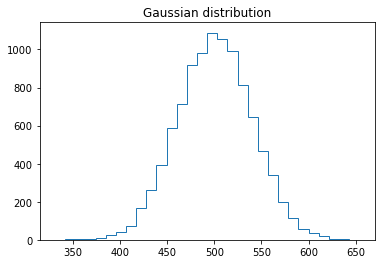

In [4]:
#Gaussian distribution
mean, std = 500, 40

# Draw 1000 random numbers from a Gaussian distribution
gauss_data = np.random.normal(mean,std,size=10000)

plt.hist(gauss_data,30,histtype='step')
plt.title('Gaussian distribution')

Lets go through an exercise where we use the ability to generate random numbers.

The distance to a nearby object can be derived from the parallax by the following formula:

$d = 1/p$

where $d$ is the distance in units of parsecs and $p$ is the parallax angle, in units of arc-seconds. GAIA is a European space telescope that has measured the parallaxes for over one billion stars. They discourage deriving the distance directly from objects with an error on the parallax of larger than 20%, but instead they suggest working directly with the parallax. Why is this?

Lets consider the star 55 Cnc. According the GAIA, it has p=0.079427$\pm$0.000077 arc-seconds.

> **Q:** Using the formula for distance, and what you know about error propogation, calculate the distance to 55 Cnc, and its uncertainty.

**sig_d/d = sig_p/p**

**sig_d = sig_p/p^2 =.000077/.079427^2 = .12**

**d= 1/p = 12.59+-.012**

We can estimate the answer to the above question using random numbers. We first draw many random numbers from a Guassian distribution with a mean and standard deviation given by the parallax measurement and its uncertainty. We then apply the distance formula to these values, and look at the resulting distribution.

> **Q:** The code below performs this operation, but is missing important pieces, and contains some syntax errors. Fill in the missing pieces and fix the errors.

Distance to 55 Cnc 12.590+-0.012


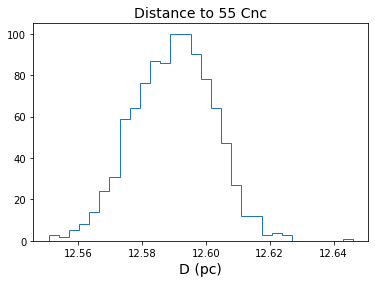

In [5]:
p_mean = 0.079427
p_std = 0.000077

p_gauss = gauss_data = np.random.normal(p_mean,p_std,size=1000)#Insert code to draw 1000 random numbers from a Gaussian distribution with a mean of p_mean and standard deviation of p_std
d_gauss = 1/p_gauss

# Plot a histogram of the distances
plt.hist(d_gauss,30,histtype='step') # missing parenthesis
plt.xlabel('D (pc)',fontsize=14)
plt.title('Distance to 55 Cnc',fontsize=14)

# Calculate the mean and standard deviation of the distances
mean_d = np.mean(d_gauss) #np.mean
std_d = np.std(d_gauss) #needs to be d_gauss
print('Distance to 55 Cnc {:0.3f}+-{:0.3f}'.format(mean_d,std_d))

> **Q:** How does the mean and standard deviation estimated in the code block above compare to your direct estimate from the formula and propogation of errors?

**[Insert answer here]**

Now lets consider what would happen if the uncertainty was larger.

> **Q:** Copy the code block from above and increase the uncertainty on the parallax measurement to 0.016 arc-seconds (=20% of the parallax measurement). Using the distance formula, with the simple propogation of error prescription, would predict d=12.6$\pm$2.5 pc. Does this match the mean and standard deviation of the distribution of distance values? Does the distribution of distance values look like a Gaussian?

**[Insert answer here]**

Distance to 55 Cnc 13.166+-3.237


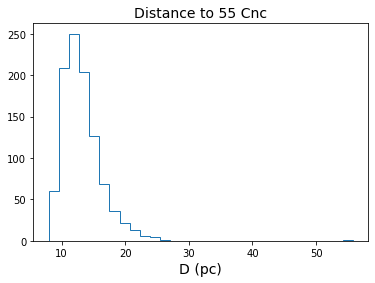

In [6]:
p_mean = 0.079427
p_std = 0.016

p_gauss = gauss_data = np.random.normal(p_mean,p_std,size=1000)#Insert code to draw 1000 random numbers from a Gaussian distribution with a mean of p_mean and standard deviation of p_std
d_gauss = 1/p_gauss

# Plot a histogram of the distances
plt.hist(d_gauss,30,histtype='step') # missing parenthesis
plt.xlabel('D (pc)',fontsize=14)
plt.title('Distance to 55 Cnc',fontsize=14)

# Calculate the mean and standard deviation of the distances
mean_d = np.mean(d_gauss) #np.mean
std_d = np.std(d_gauss) #needs to be d_gauss
print('Distance to 55 Cnc {:0.3f}+-{:0.3f}'.format(mean_d,std_d))

Often times you might be interested in knowing the probability of drawing a certain value from a given distribution. For example, we take an image of a region of the sky and find that the background level has an average value of 100 electrons, with a standard deviation of 20 electrons (we will assume a Gaussian distribution). In part of the image we detect a signal of 145 electrons. How likely is it that the background could generate a signal this large? If it is highly unlikely, then we can safely assume that something else (e.g., a star, a galaxy) produced this signal. If we wanted to set a threshold such that less than such that 0.01% of the background pixels would exceed this threshold by random chance, what would the value of this threshold be?

Python has built in functions that can perform these calculations. We first must create a Gaussian object with a given mean and standard deviation.

In [7]:
# We need to import the scipy.stats package first
import scipy.stats

# This creates a Gaussian object with a given mean and standard deviation
mean = 100
standard_deviation = 20
my_gauss_object = scipy.stats.norm(mean,standard_deviation) #<- This is our Gaussian object

Once this object has been created, we can use it to perform various calculations

In [8]:
# Probability of measuring a value of 145 or larger
prob_greaterthan145 = my_gauss_object.sf(145)
print('P(x>145): {:0.3f}'.format(prob_greaterthan145))

# The value X, such that the probability of getting a value less then X is the input
prob997_value = my_gauss_object.ppf(.997)
print('X, for which P(x<X) = 0.997: {:0.2f}'.format(prob997_value))

P(x>145): 0.012
X, for which P(x<X) = 0.997: 154.96


> **Q:** A recent image from our 24-inch telescope has background level of 350$\pm$30 ADUs. Suppose you wanted to set a threshold such that only 0.001% of the background pixels in this images would randomly be brighter than this threshold. What threshold value would you choose?

**477.95**

In [9]:
# Use this space to answer the above question
mean = 350
standard_deviation = 30
my_gauss_object = scipy.stats.norm(mean,standard_deviation) #<- This is our Gaussian object
prob997_value = my_gauss_object.ppf(.99999)
print('X, for which P(x<X) = 0.99999: {:0.2f}'.format(prob997_value))

X, for which P(x<X) = 0.99999: 477.95


A similar thing can be done with a Poisson distribution

In [10]:
# Set up our Poisson distribution, with a given mean
mu = 2
my_poss_dist = scipy.stats.poisson(mu)

# Probability that a value drawn from this distribution is greater than or equal to 10
prob_greaterthan10 = my_poss_dist.sf(10)
print('P(x>10): {:0.5f}'.format(prob_greaterthan10))

# The value X, such that the probability of getting a value less than X is the input
prob997_value = my_poss_dist.ppf(.997)
print('X, for which P(x<X) = 0.997: {}'.format(prob997_value))

P(x>10): 0.00001
X, for which P(x<X) = 0.997: 7.0


> **Q:** The following table lists the flux levels of the background under different conditions. It lists the flux levels either before or after the data has been calibrated.

|Conditions|Flux level (ADUs) after calibration|
|:-----:|:----:|
|(1) Dome lights on, shade between dome and control room is open|550|
|(2) Dome lights off, shade between dome and control room is open|200|
|(3) Dome lights off, shade between dome and control room is closed|150|


> **Q:** What is the probability of measuring the flux level in situation (2) given the flux level in situation (3)? What is the probability of measuring the flux level in situation (1) given the flux level in situation (3)? What is the probability of measuring the flux level in situation (1) given the flux level in situation (2)? If the probabilities are small enough (0.05 is often taken as a threshold) then we would say that the difference is statistically significant. Based on this, is it worth turning the lights off in our dome, and/or closing the shade between the dome and the control room when collecting data?

**The low probabilities when comparing the different flux levels indicates that there is a significant difference in the flux levels, and so it is worth turning off the dome lights, and closing the shade between the dome and the control room.**

In [11]:
# Use this code black to answer the question above
mu = 150
my_poss_dist = scipy.stats.poisson(mu)

# Probability that a value drawn from this distribution is greater than or equal to 10
prob_greaterthan10 = my_poss_dist.sf(200)
print('P(x>200): {:0.6f}'.format(prob_greaterthan10))


# Use this code black to answer the question above
mu = 150
my_poss_dist = scipy.stats.poisson(mu)

# Probability that a value drawn from this distribution is greater than or equal to 10
prob_greaterthan10 = my_poss_dist.sf(550)
print('P(x>200): {:0.6f}'.format(prob_greaterthan10))

# Use this code black to answer the question above
mu = 200
my_poss_dist = scipy.stats.poisson(mu)

# Probability that a value drawn from this distribution is greater than or equal to 10
prob_greaterthan10 = my_poss_dist.sf(550)
print('P(x>200): {:0.6f}'.format(prob_greaterthan10))


P(x>200): 0.000042
P(x>200): 0.000000
P(x>200): 0.000000


### Identifying statistically significant features

You can determine if the signal from a region of your image is statistically significant (i.e., the signal is highly unlikely to be cause by random fluctuations in the background noise) if you have a good estimate of the background flux and the noise. But sometimes these can be hard to measure.

The code block below reads in the Kepler light curve of a young star. It populates three numpy arrays:


*   `time`: Modified julian date at which the observations were taken
*   `flux`: The flux during each observations
*   `flux_err`: The uncertainty in each flux observation.



In [12]:
image = fits.open('EPIC203954898_kepler_llc.fits')
time, flux, flux_err = [], [], []
for i in image[2].data:
  time.append(i[0])
  flux.append(i[1])
  flux_err.append(i[2])
time = np.array(time)
flux = np.array(flux)
flux_err = np.array(flux_err)
image.close()

> **Q:** Plot the light curve (time vs flux) for this object. Label the axes. Print out the mean and standard deviation. To the graph, add a horizontal line indicating the mean. Add horizontal lines at values 3 sigma above and below the mean.

0.9970367656974496 0.3930493311563888


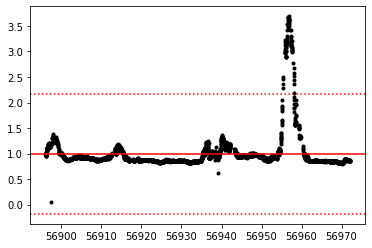

In [13]:
print(np.mean(flux),np.std(flux))
plt.plot(time,flux,'.k')
plt.axhline(np.mean(flux),color='r')
plt.axhline(np.mean(flux)+3*np.std(flux),ls=':',color='r')
plt.axhline(np.mean(flux)-3*np.std(flux),ls=':',color='r')


If we assume the noise on the flux is a Gaussian distribution, then we could use Gaussian statistics to determine the probability of each peak (or conversely, set a threshold above which any features are highly unlikely to be due to random chance). But calculating the mean and standard deviation directly from all of the data is skewed by the outbursts themselves.


What we want is to select out relatively smooth regions of the light curve, and calculate the mean and standard deviation from those regions. To do this we can take advantage of logical operators in python, and the combination of boolean arrays with numpy arrays.

If we use a statement like:

```
late = time>56965
```

the variable `late` will have the same shape as `time` but each element will be either True or False, depending on whether or not is satisfies the logical condition. Note that this only works for numpy arrays, and will fail for lists or tuples. We can use a for loop to see this in detail.

In [14]:
late = time>56965
for i in range(len(time)):
  print(time[i],late[i])

56896.00170910173 False
56896.042573410436 False
56896.063005564094 False
56896.08343771729 False
56896.10386997001 False
56896.124302122735 False
56896.14473417453 False
56896.16516642585 False
56896.18559857672 False
56896.20603062758 False
56896.22646287751 False
56896.246894926975 False
56896.26732707644 False
56896.28775932497 False
56896.30819137351 False
56896.32862352111 False
56896.34905576871 False
56896.36948781585 False
56896.38991996206 False
56896.41035220826 False
56896.430784254 False
56896.45121639928 False
56896.47164864408 False
56896.49208078843 False
56896.512512932306 False
56896.53294507571 False
56896.55337721866 False
56896.57380936114 False
56896.59424150315 False
56896.65553792687 False
56896.67597006749 False
56896.69640230718 False
56896.71683434686 False
56896.737266485616 False
56896.75769872437 False
56896.77813076266 False
56896.79856290002 False
56896.81899513738 False
56896.839427174265 False
56896.859859310694 False
56896.88029154665 False
56896.9007

56914.656103510206 False
56914.676535225095 False
56914.69696713975 False
56914.717398953944 False
56914.737830667895 False
56914.75826258139 False
56914.778694394874 False
56914.819558020696 False
56914.839989833024 False
56914.860421645346 False
56914.90128526883 False
56914.92171708023 False
56914.94214889116 False
56914.96258070186 False
56915.35078515154 False
56915.39164866129 False
56915.4120805657 False
56915.43251236988 False
56915.45294417359 False
56915.4733759773 False
56915.49380778055 False
56915.51423968356 False
56915.55510318866 False
56915.57553509097 False
56915.59596679282 False
56915.61639859444 False
56915.636830495816 False
56915.657262196735 False
56915.69812589787 False
56915.71855759809 False
56915.73898939808 False
56915.77985299712 False
56915.80028489618 False
56915.820716694994 False
56915.84114839335 False
56915.86158029171 False
56915.8820120896 False
56915.90244378726 False
56915.922875684686 False
56915.94330748164 False
56915.9637391786 False
56915.98

56932.77903493785 False
56932.79946657276 False
56932.81989810767 False
56932.84032984234 False
56932.86076147702 False
56932.88119321147 False
56932.90162474591 False
56932.96291964854 False
56932.98335128252 False
56933.003783016386 False
56933.024214550125 False
56933.04464618387 False
56933.06507781739 False
56933.08550945078 False
56933.10594108418 False
56933.12637281746 False
56933.1468043505 False
56933.16723608355 False
56933.187667716484 False
56933.20809924929 False
56933.22853098199 False
56933.248962614576 False
56933.26939414715 False
56933.2898258795 False
56933.31025751174 False
56933.33068904396 False
56933.35112077608 False
56933.371552408076 False
56933.39198393996 False
56933.41241567173 False
56933.43284730338 False
56933.45327903491 False
56933.47371056633 False
56933.49414219774 False
56933.514573929046 False
56933.535005460115 False
56933.555437091185 False
56933.57586882213 False
56933.59630045297 False
56933.6167319838 False
56933.637163714404 False
56933.6575

56945.4875025077 False
56945.5079341177 False
56945.528365727725 False
56945.548797337804 False
56945.56922894789 False
56945.589660558006 False
56945.61009216817 False
56945.630523778345 False
56945.65095538858 False
56945.71225031944 False
56945.73268182978 False
56945.75311354016 False
56945.77354515059 False
56945.79397666105 False
56945.814408371516 False
56945.83483998203 False
56945.85527149261 False
56945.87570320319 False
56945.93699803516 False
56945.95742964588 False
56945.97786135664 False
56945.99829286745 False
56946.01872447829 False
56946.03915618916 False
56946.05958770009 False
56946.100451022 False
56946.12088253305 False
56946.22304058873 False
56946.24347219998 False
56946.263903911255 False
56946.3456303568 False
56946.36606206831 False
56946.38649357982 False
56946.40692519139 False
56946.42735690302 False
56946.468220026385 False
56946.488651738095 False
56946.50908324981 False
56946.52951496164 False
56946.549946573505 False
56946.57037808542 False
56946.590809

56961.89411965481 False
56961.91455126458 False
56961.93498307457 False
56961.95541478469 False
56961.97584649515 False
56961.99627820573 False
56962.01670991666 False
56962.037141627705 False
56962.05757333898 False
56962.07800505049 False
56962.1393001863 False
56962.15973199875 False
56962.1801637113 False
56962.200595324095 False
56962.22102713723 False
56962.24145885049 False
56962.26189056398 False
56962.28232227771 False
56962.30275399166 False
56962.32318570585 False
56962.34361742015 False
56962.364049034804 False
56962.38448084958 False
56962.4049125647 False
56962.42534417993 False
56962.44577599552 False
56962.466207711215 False
56962.48663952715 False
56962.50707114332 False
56962.527502859724 False
56962.54793467635 False
56962.56836629322 False
56962.6296614451 False
56962.65009326289 False
56962.670524980924 False
56962.69095669907 False
56962.71138841756 False
56962.73182013618 False
56962.752251855025 False
56962.772683574214 False
56962.79311529353 False
56962.813547

One advantage of defining this variable is that it can be passed to the variable `time` as you would any index, and it will select out the elements in `time` where `late` is True.

In [15]:
print(time[late])

[56965.02017472 56965.04060647 56965.06103821 56965.08147006
 56965.10190171 56965.12233345 56965.1427653  56965.16319695
 56965.18362869 56965.20406054 56965.22449229 56965.24492404
 56965.26535579 56965.32665104 56965.34708278 56965.36751463
 56965.38794629 56965.40837814 56965.42880989 56965.44924154
 56965.46967339 56965.49010514 56965.51053679 56965.57183205
 56965.5922639  56965.61269565 56965.63312741 56965.65355916
 56965.67399082 56965.69442267 56965.71485442 56965.73528618
 56965.75571793 56965.77614969 56965.8170132  56965.83744495
 56965.85787681 56965.87830857 56965.89874022 56965.91917208
 56965.93960384 56965.9600356  56965.98046735 56966.00089911
 56966.06219439 56966.08262625 56966.10305791 56966.12348977
 56966.14392153 56966.16435319 56966.18478505 56966.20521681
 56966.22564847 56966.24608033 56966.30737561 56966.32780728
 56966.34823914 56966.3686709  56966.40953443 56966.42996619
 56966.45039796 56966.47082972 56966.49126148 56966.55255678
 56966.57298864 56966.59

Another helpful feature of these boolean arrays is that True is equivalent to 1 while False is equivalent to 0. This means that we can quickly find out how many elements within `time` satisfy our condition by summing `late`.

In [16]:
print('Number of elements with time>26965: ',late.sum())

Number of elements with time>26965:  293


This selection can also be applied to other arrays that have the same shape as `time`. For example, `flux[late]` selects out the flux values that have time>56965. In this way you can select out a range of times in the light curve, and then utilize the fluxes from those times.

In selecting out time frames, it may be helpful to use comparison operators:


*   `==` equal
*   `!=` not equal
*   `>` greater than
*   `<` less than
*   `>=` greater than or equal
*   `<=` less than or equal

and bitwise logical operators

* `&` and: Returns true if both statements are true
* `|`  or: Returns true if either statement is true

This allows us to select out multiple regions of the light curve, e.g.:

```
my_selection = ((time > 56900) & (time < 56950)) | (time > 56965)
```


>**Q:** Select out a time frame, or a set of time frames, within the light curve in which there are no obvious outbursts. Estimate the mean and standard deviation from these quiescent regions of the light curve. Plot the light curve, with horizontal lines marking the new mean, as well as 3 standard deviations above and below the mean. Plot the points used in estimating the mean and standard deviation using red dots.







1178
0.8738341009677569 0.032283348458592265


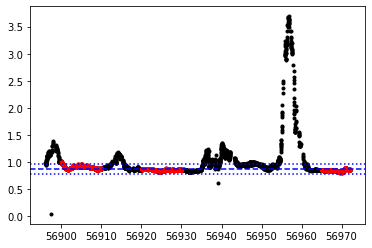

In [17]:
mid = ((time>56920) & (time<56930)) | ((time>56900) & (time<56910)) | (time>56965)
print (mid.sum())

m,s = np.mean(flux[mid]),np.std(flux[mid])
print(m,s)

plt.plot(time,flux,'.k')
plt.plot(time[mid],flux[mid],'.r')
plt.axhline(m,ls='--',color='b')
plt.axhline(m+3*s,ls=':',color='b')
plt.axhline(m-3*s,ls=':',color='b')

>**Q:** What is the error on the mean that you just calculated?

**0.00094**

>**Q:** There are 2863 data points in this light curve. We want to set a flux threshold such that fewer than 1 data point will exceed this threshold by random chance. Assuming Gaussian noise, and using the mean and standard deviation calculated above, calculate the flux threshold for which fewer than 1 data point will exceed this threshold by random chance. Identify the points within the light curve that exceed this threshold. Plot the light curve, and plot the points that exceed the threshold with blue squares.

In [18]:
#error on the mean
print(s/np.sqrt(mid.sum()))

0.0009406020665627677


605


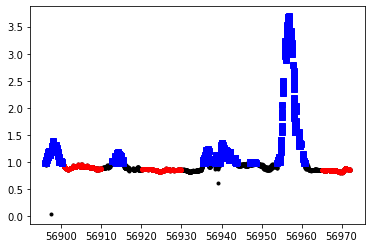

In [19]:
my_gauss_object = scipy.stats.norm(m,s)
bright = flux>my_gauss_object.ppf(1-1./2863)
print(bright.sum())
plt.plot(time,flux,'.k')
plt.plot(time[mid],flux[mid],'.r')
plt.plot(time[bright],flux[bright],'s',color='b')

*Calculate the total flux in one of the lines, including uncertainty? It would be useful for them to see know how to add uncertainties in quadrature, since that could come up later.*

*Look at a spectrum taken at our observatory? Look at the light curve of a different object?* 

### Combining probability distributions

Often we are concerned with the probability that multiple different events have occured simultaneously. e.g., What is the probability that the flux in one pixel is very high, and the flux in a neighboring pixel is also very high?

Lets consider a simple example. Suppose you measure the distance to a particular star (star A) to be d=410$\pm$30 pc. From other information you know that this star is part of a cluster of stars, and that the measured distance to this star is 350 pc.

What is the probability of measuring the distance to star A that you found, assuming that it is actually at 350 pc? This is the same as asking the question: If we had a Gaussian distribution with a mean of 350 and a standard deviation of 30, what is the probability that we would randomly draw the value 410 from this distribution. We can turn to our Gaussian object to answer this question.

> **Q:** Modify the code block below to create the necessary Gaussian object.

In [20]:
da_gauss = scipy.stats.norm(350,30) #<- Insert a mean of 350 and a standard deviation of 30 for this object

#Calculate the probability of measuring a distance of 410.
probA = da_gauss.pdf(410)
print('P(dA=410) = {:0.3e}'.format(probA))

P(dA=410) = 1.800e-03


Now suppose that you measured the distance to another star in the same cluster, and you found its distance to be d=450$\pm$40 pc. Both of these are above the assumed distance of the cluster, but the uncertainties are large. What is the probability that we would make both of these measurements, assuming both stars are at a distance of 350 pc?

In that case we multiply the probabilities together:

$P(d_A=410$ and $d_B=450) = P(d_A=410)*P(d_B=450)$

> **Q:** What is the probability of measuring a distance of 450 pc for star B, assuming it is part of the cluster at 350 pc? What is the probability of measuring star A at a distance of 410 pc AND star B at a distance of 450 pc? Modify the code block below to answer these questions.

In [21]:
db_gauss = scipy.stats.norm(350,40) #<- Insert a mean of 350 and a standard deviation of 40 in this object

probB = db_gauss.sf(450)#Insert code to caluclate the probability of measuing a distance of 450 pc for star B
print('P(dB=450) = {:0.3e}'.format(probB))

probAB = probA*probB
print('P(dA=410 and dB=450) = {:0.3e}'.format(probAB))

P(dB=450) = 6.210e-03
P(dA=410 and dB=450) = 1.118e-05


Now suppose that we measure the distance to handful of other stars:


|Star| Distance|
|:----:|:---------:|
|C| 364 $\pm$ 29|
|D| 391 $\pm$ 11|
|E| 312 $\pm$ 54|
|F| 392 $\pm$ 11|
|G| 394 $\pm$ 10|
|H| 395 $\pm$ 25|
|I| 403 $\pm$ 6|
|J| 556 $\pm$ 49|
|K| 343 $\pm$ 62|
|L| 390 $\pm$ 15|

With these additional measurements you may start to notice that they are all larger than the previously estimated distance to the cluster. Maybe there is something wrong with that distance! Can we find a better distance estimate to the cluster?

Assuming all of these stars are at the same distance, we can estimate the *most likely* distance to the cluster. To do this we can estimate the probability of measuring all of these distances for different values of the cluster distance. We can then determine the cluster distance for which the combined probability is the highest.

> **Q:** We want to write a function that takes as inputs (1) an array containing the distances to a set of stars, (2) an array containing the uncertainties in the distances to these stars and (3) an estimate of the distance to the cluster containing these stars. The function returns the probability that all of these stars are at the given distance. In the space below, write pseudo-code laying out the structure of this function

```
[insert answer here]
```

> **Q:** In the code block below, write out a function that completes this operation.


In [22]:
# Insert code here
def calc_like(distances, uncs, cluster_dist):
  prob = 1
  for d,u in zip(distances,uncs):
    gauss = scipy.stats.norm(cluster_dist,u) #<- Insert a mean of 350 and a standard deviation of 40 in this object
    prob*= gauss.pdf(d)
  return(prob)

def calc_combined_prob(cluster_distance = 350): #<-- Modify this line so that it takes the cluster distance as the input, with a default value of 350.

    distances=[364,391,312,392,394,395,403,556,343,390]
    uncertainties=[49,31,54,31,30,55,36,79,92,45]#Create a list of the uncertainties


    prob_total = 1
    for i in range(len(distances)):
        gauss_object = scipy.stats.norm(cluster_distance,uncertainties[i])#Insert code to create a Gaussian object with mean given by the cluster distance, and standard deviation given by the uncertainty to the particular star
        prob_this_star = gauss_object.pdf(distances[i])#Insert code to use the created Gaussian object to estimate the probability of getting the measured distance to a star
        #print(distances[i],uncertainties[i],(distances[i]-cluster_distance)/uncertainties[i],prob_this_star)
        prob_total *= prob_this_star #<- This line is equivalent to prob_total = prob_total * prob_this_star

    #Insert code here that returns the prob_total variable
    return(prob_total)

> **Q:** Using the above function, calculate the combined probabilities for each of the cluster distances below. What is the most likely distance of the cluster?

|Cluster Distance (pc)| Probability|
|:-------------------:|:----------:|
|350||
|370||
|390||
|410||
|430||
|450||
|470||
|490||

In [23]:
calc_combined_prob(350)

4.777788762987151e-25

In [24]:
# Use this space to calculate the probabilities of different cluster distances
distances=[364,391,312,392,394,395,403,556,343,390]
uncertainties=[29,11,4,11,10,25,6,49,62,15]
cluster=[300,320,330,350,370,390,410,430,450,470,490]
for c in cluster:
  print(c)
  print(calc_like(distances,uncertainties,c))
  print(calc_combined_prob(c))

300
6.321697850418717e-150
2.494221426681772e-33
320
1.2998808846664297e-101
2.943905909404151e-29
330
1.3991448609563918e-85
1.3346958592895256e-27
350
9.133334348072957e-70
4.777788762987151e-25
370
1.2878361124564381e-75
1.663318370821506e-23
390
3.922440909474964e-103
5.631545945001388e-23
410
2.580576799756498e-152
1.8543157499527252e-23
430
3.667260284915589e-223
5.938045902409071e-25
450
1.12572225e-315
1.8492993703945056e-27
470
0.0
5.60111772865908e-31
490
0.0
1.6498558019430278e-35


## Putting it all together

Let's return to the exercise from the end of the last lab, in which you calculated the flux from the supernova in M101 over multiple days. Previously you plotted the flux as a function of time, but now let's consider a more complicated question: Does the flux change at a *statistically significant* level?

1. Look back at the previous week's notebook and record the mean fluxes of the supernova at each epoch.
2. Based on the standard deviation of the background, and the number of pixels used to calculate the mean, estimate the error on the mean
3. Using Gaussian probability distribution, determine if the flux in any of the post-explosion epochs is statistically significantly larger than the pre-explosion epoch.
4. Using Gaussian probability distributions, determine if the flux changes from one epoch to the next (i.e., from epoch 1 to epoch 2, from epoch 2 to epoch 3, from epoch 3 to epoch 4, from epoch 4 to epoch 5).

[114.59449845 992.58123805 965.50958233 526.064509    44.45919062]


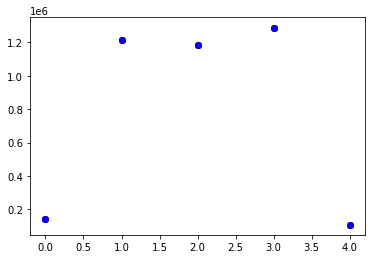

In [39]:
fluxes = np.array([140349.02426871032,1215658.780735203,1182502.9092433518,1288589.618843098,108902.33139664464])
unc = np.array([50,50,50,100,100])
unc2=np.sqrt(fluxes)

plt.errorbar(np.arange(len(fluxes)),fluxes,yerr=unc,fmt='ok')
plt.errorbar(np.arange(len(fluxes)),fluxes,yerr=unc2,fmt='or')
plt.errorbar(np.arange(len(fluxes)),fluxes,yerr=unc*np.sqrt(30*20),fmt='ob')
print(fluxes/(unc*np.sqrt(30*20)))

In [40]:
gauss_object = scipy.stats.norm(fluxes[0],unc[0]*np.sqrt(30*20))
print(gauss_object.sf(fluxes[1]),gauss_object.sf(fluxes[2]),gauss_object.sf(fluxes[3]),gauss_object.sf(fluxes[4]))

gauss_object1 = scipy.stats.norm(fluxes[1],unc[1]*np.sqrt(20*30))
print('Change from epoch 2 to 3:',gauss_object1.sf(fluxes[2]))

gauss_object2 = scipy.stats.norm(fluxes[2],unc[2]*np.sqrt(20*30))
print('Change from epoch 3 to 4:', gauss_object2.sf(fluxes[3]))

gauss_object3 = scipy.stats.norm(fluxes[3],unc[3]*np.sqrt(20*30))
print('Change from epoch 4 to 5: ',gauss_object3.sf(fluxes[4]))

0.0 0.0 0.0 1.0
Change from epoch 2 to 3: 1.0
Change from epoch 3 to 4: 0.0
Change from epoch 4 to 5:  1.0


In [51]:
image = fits.open('NGC6884_spec.fits')
wave, sflux, = [], []
for i in image[1].data:
    print(i[0],i[1])
    wave.append(i[0])
    sflux.append(i[1])
wave = np.array(time)
sflux = np.array(sflux)
image.close()

3677.505389221557 5.5481727170293845e+20
3679.323353293413 5.3113439053399825e+20
3681.1413173652695 5.0843193453192466e+20
3682.959281437126 4.8667056698417866e+20
3684.7772455089817 4.658124797299866e+20
3686.595209580838 4.458213356771444e+20
3688.4131736526942 4.266622134093535e+20
3690.2311377245505 4.083015538105154e+20
3692.049101796407 3.90707108635092e+20
3693.867065868263 3.7384789095595567e+20
3695.6850299401194 3.576941274235021e+20
3697.5029940119757 3.4221721227206446e+20
3699.320958083832 3.273896630118395e+20
3701.1389221556883 3.131850777466373e+20
3702.9568862275446 2.9957809405983955e+20
3704.774850299401 2.865443494128718e+20
3706.592814371257 2.740604430024534e+20
3708.4107784431135 2.6210389902470054e+20
3710.22874251497 2.5065313129595093e+20
3712.046706586826 2.396874091819118e+20
3713.8646706586824 2.2918682478837963e+20
3715.6826347305387 2.1913226136841532e+20
3717.500598802395 2.0950536290239906e+20
3719.3185628742513 2.002885048088966e+20
3721.1365269461076

5199.539890710383 -843.9096679506074
5201.4 -197.83238150716352
5203.2601092896175 -236.67017621279047
5205.120218579235 773.9963066652745
5206.980327868852 424.68498492639264
5208.84043715847 1848.1738324573962
5210.700546448088 -53.91623399420496
5212.560655737705 -2673.2214648489426
5214.420765027322 1509.5503842103353
5216.28087431694 -3043.0242379257725
5218.140983606558 49.6607894940953
5220.001092896175 -1996.6621934520317
5221.8612021857925 1597.1935851408525
5223.72131147541 -967.6881690110877
5225.581420765027 118.23137738015976
5227.441530054645 27.86408621348164
5229.301639344262 3044.683036444867
5231.16174863388 763.5042253500669
5233.021857923497 -1193.4001248512723
5234.881967213115 1333.701257005372
5236.742076502733 -889.350956947821
5238.60218579235 2306.3057544313215
5240.462295081968 -583.5267812894235
5242.3224043715845 2822.059784825078
5244.182513661202 -2075.7296144718475
5246.042622950819 -1350.1610249126443
5247.902732240437 1035.5938242715038
5249.7628415300

6187.257923497268 -757.6964466552199
6189.118032786885 2255.061850836475
6190.978142076503 -2495.78415161088
6192.83825136612 -2148.73711917308
6194.698360655738 1908.4987449414512
6196.558469945356 44.28751703012131
6198.418579234973 2846.5163188232946
6200.2786885245905 266.70406808507687
6202.1387978142075 -667.5551462465537
6203.998907103825 -536.0196191827508
6205.859016393442 623.945962730435
6207.71912568306 2664.3032915872063
6209.579234972678 17024.471233510656
6211.439344262295 -184.8927057784913
6213.299453551913 -274.5965907113241
6215.15956284153 -785.6561257735902
6217.019672131148 301.57903105365585
6218.879781420765 -1496.0792590463589
6220.7398907103825 -3592.272838568515
6222.6 -32.66255271404407
6224.460109289617 -1539.7614449552693
6226.320218579235 -1639.082563791335
6228.180327868852 -3257.7671584142045
6230.04043715847 615.2653192916914
6231.900546448087 -1565.3727853879154
6233.760655737705 -623.759826277068
6235.620765027323 1145.8132291391776
6237.48087431694 

7357.493975903614 80257404190935.58
7359.3373493975905 86939216986983.69
7361.180722891566 94147137751382.9
7363.024096385542 101920418430558.86
7364.8674698795185 110301089410423.8
7366.710843373494 119334146336524.23
7368.55421686747 129067748796739.89
7370.3975903614455 139553431591599.48
7372.240963855422 150846329566945.9
7374.084337349397 163005416520257.28
7375.9277108433735 176093759273198.1
7377.77108433735 190178787753750.12
7379.614457831325 205332581869038.2
7381.457831325301 221632176556415.0
7383.301204819277 239159885667506.2
7385.144578313253 258003646071682.2
7386.9879518072285 278257383132998.22
7388.831325301205 300021398707761.3
7390.674698795181 323402783194426.2
7392.518072289156 348515852755807.4
7394.361445783133 375482613539831.9
7396.204819277108 404433254137403.0
7398.048192771084 435506668170693.44
7399.891566265061 468851008621447.1
7401.734939759036 504624275822264.94
7403.578313253012 542994940961853.0
7405.421686746988 584142607256081.9
7407.265060240964

### To turn in this lab, share the lab with me using the *Share* button in the upper right.